# Basic python


### First some markdown examples

Same <i>value</i>, same objects, define `a`(and I _really_ would like):
An equation $$\sqrt{\frac{2}{3}}$$

* bullets
* one more

> As a comment on the side, I would like
>to <i>say</i>

### And now simple table

|First |Second|Third|
|---|---|---|
|val1|afd|afasd


```java
int sum = widgets.stream()
                      .filter(b -> b.getColor() == RED)
                      .mapToInt(b -> b.getWeight())
                      .sum();
```

### Widgets

In [24]:
from IPython.core.display import display
from ipywidgets import widgets

text = widgets.Label(value="Choose a number")
slider = widgets.IntSlider(
    readout=False,
    min=-10,
    max=100,
    step=5,
    value=30
)
label = widgets.Label('')
hbox = widgets.HBox([slider, widgets.Label("value: "), label])
vbox = widgets.VBox([widgets.Label("My first widget: "), hbox])
display(vbox)

l = widgets.jslink((slider, 'value'), (label, 'value'))

print(slider.value)

30


### Plotting

Plotting inline

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


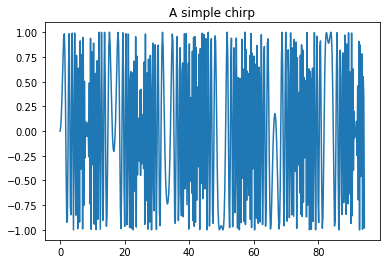

In [26]:
x = np.linspace(0, slider.value*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

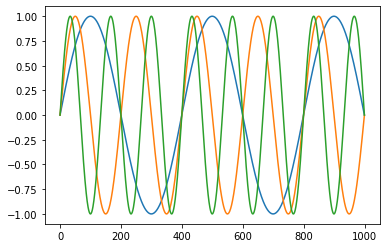

In [27]:
plt.figure()
x = np.linspace(0, 5 * np.pi, 1000)
for n in range(1, 4):
    plt.plot(np.sin(n * x))
plt.show()


In [28]:
a = 2
print(a)
print(id(a))

b = 2
print(b)
print(id(b))


2
4338226336
2
4338226336


assignment:

In [29]:
c = b
print(c)
print(id(c))

2
4338226336


custom function with input:

In [30]:
def f1(var1):
    print("Printing within function: ")
    print(var1)
    print(id(var1))
    #modifying variable changes id
    var1 += 2
    print("Print after adding 2:")
    print(var1)
    print(id(var1))
    return var1

d = f1(a)
print("Input outside function:")
print(a)
print(id(a))
print("Result of function:")
print(d)
print(id(d))

Printing within function: 
2
4338226336
Print after adding 2:
4
4338226400
Input outside function:
2
4338226336
Result of function:
4
4338226400


Parameters to functions are references to objects which are passed by value. Still List is mutable
so it can be modified and reference is still the same

In [31]:
def try_to_modify(x, y, z):
    x = 23
    y.append(42)
    z = [99] # new reference
    print(x)
    print(y)
    print(z)

a = 77
print(id(a))
b = [99]
print(id(b))
c = [28]
print(id(c))
try_to_modify(a, b, c)
print(a)
print(id(a))
print(b)
print(id(b))
print(c)
print(id(c))

4338228736
4694118720
4691771552
23
[99, 42]
[99]
77
4338228736
[99, 42]
4694118720
[28]
4691771552


### Function annotations

Annotations are available in `f.__annotations__`

In [32]:
def f1(var: int, list1: list, var1) -> list:
    print(f1.__annotations__)
    print("Type of __annotations__", type(f1.__annotations__))
    list1[0] += var
    return list1

print(f1(2, [2, 3], 3))

{'var': <class 'int'>, 'list1': <class 'list'>, 'return': <class 'list'>}
Type of __annotations__ <class 'dict'>
[4, 3]


### Default values
Default values are evaluated only once


In [33]:
L = []
print(L)

# there is even a warning
def f2(a, L=[]):
    L.append(a)
    return L

print(f2(a, L))
print(f2(65, L))

print(f2(a))
print(f2(78))

LL=[]
print(f2(a, LL))
print(f2(23, LL))

print(f2(12))

# suggeted solution
def f3(a, L = None):
    if L is None:
        L=[]
    L.append(a)
    return L

[]
[77]
[77, 65]
[77]
[77, 78]
[77]
[77, 23]
[77, 78, 12]


### Lists and other containers

List is mutable

In [34]:
myList = [32, 4, 34, 2]
print(myList)

sortedList = sorted(myList)
print(sortedList)
print(myList)

# sorting in place
myList.sort()
print(myList)

[32, 4, 34, 2]
[2, 4, 32, 34]
[32, 4, 34, 2]
[2, 4, 32, 34]


Basic operations



In [35]:
myList = [32, 4, 34, 2]
print(myList)

#add at the end
myList.append(3)
print(myList)

myList.extend([44, 78])
print(myList)

#remove from end
print(myList.pop())
print(myList)

#sort (a copy)
print("sorted: " + repr(sorted(myList)))
print(myList)

print("reversed: " + repr(list(reversed(myList))))

[32, 4, 34, 2]
[32, 4, 34, 2, 3]
[32, 4, 34, 2, 3, 44, 78]
78
[32, 4, 34, 2, 3, 44]
sorted: [2, 3, 4, 32, 34, 44]
[32, 4, 34, 2, 3, 44]
reversed: [44, 3, 2, 34, 4, 32]


Lists as queues (deques):


In [36]:
from collections import deque
myList = [32, 4, 34, 2]
myList = deque(myList)
print(myList)

myList.append(12)
print(myList)

myList.appendleft(3)
print(myList)

myList.pop()
print(myList)

myList.popleft()
print(myList)

deque([32, 4, 34, 2])
deque([32, 4, 34, 2, 12])
deque([3, 32, 4, 34, 2, 12])
deque([3, 32, 4, 34, 2])
deque([32, 4, 34, 2])


### Comprehensions

No side effects:

In [37]:
print("with list")
print([x**2 for x in [2, 3, 4]])
print("with tuple")
print([x**2 for x in (2, 3, 4)])
a = [2, 3, 4]
b = [4, 6, 7]
print("with zip")
print([x+y for (x,y) in zip(a,b)])

print("double loop")
print([(x, y) for x in a if x != 3 for y in b if x!=y])

a.append(b)
print("b appended to a")
print(a)
print("unpacking positional args")
print(*a)

with list
[4, 9, 16]
with tuple
[4, 9, 16]
with zip
[6, 9, 11]
double loop
[(2, 4), (2, 6), (2, 7), (4, 6), (4, 7)]
b appended to a
[2, 3, 4, [4, 6, 7]]
unpacking positional args
2 3 4 [4, 6, 7]


### Sets and dictionaries

Sets go in `{}`
There are a few ways to create a dictionary:

In [38]:
set1 = {'sdfs', 'dsfdfd', 'sdffffs'}
print("dict comprehension")
dict1 = {x: len(x) for x in set1}
print(dict1)
dict2=dict([('dsa', 2), ('ddd', 5)])
print(dict2)
dict3 = {'werw':4, 'sddd':5}
print(dict3)


dict comprehension
{'dsfdfd': 6, 'sdffffs': 7, 'sdfs': 4}
{'dsa': 2, 'ddd': 5}
{'werw': 4, 'sddd': 5}


### with and Context Managers

basic constructs:

`with` expression as `alias for whatever it returns` :

operations

`with` requires at least `enter()` and `exit()`

In [39]:
class SquareRange:
    def __init__(self, length):
        self._length = length
    def __enter__(self):
        print("initializing")
        return [i**2 for i in range(self._length)]
    def __exit__(self, exc_type, exc_val, exc_tb):
        print("exiting")


with SquareRange(5) as squares:
    print(squares)

print("exit does not handle exceptions as now it always returns None, if we return True that means exceptions is handled")

with SquareRange("dfsdff") as squares:
    print(squares)

initializing
[0, 1, 4, 9, 16]
exiting
exit does not handle exceptions as now it always returns None, if we return True that means exceptions is handled
initializing


TypeError: 'str' object cannot be interpreted as an integer

In [41]:
class SquareRange2(SquareRange):
    def __exit__(self, exc_type, exc_val, exc_tb):
        print(type(exc_type))
        print(exc_type)
        print(type(exc_val))
        print(exc_val)
        print(type(exc_tb))
        print(exc_tb)
        return True

with SquareRange2(5) as squares:
    print(squares)

with SquareRange2("dfsdff") as squares:
    print(squares)

initializing
[0, 1, 4, 9, 16]
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None
initializing


TypeError: 'str' object cannot be interpreted as an integer

Even though we implemented exception handling, an exception is still raised. This is because exception happens in `enter()` method. It only handles exception raised within the `with` body

In [42]:
with SquareRange2(5) as squares:
    squares + "string"

initializing
<class 'type'>
<class 'TypeError'>
<class 'TypeError'>
can only concatenate list (not "str") to list
<class 'traceback'>


### generators

We can now try to implement this class as a proper generator

In [44]:
class SquareRange2Generator(SquareRange2):
    def iterate(self):
        for i in self._list:
            print("Iterating: ")
            yield i

    def __enter__(self):
        self._list = super().__enter__()
        return self.iterate()
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        if isinstance(exc_type, StopIteration):
            return True
        return super().__exit__(exc_type, exc_val, exc_tb)
    
with SquareRange2Generator(5) as squares:
    for i in squares:
        print(i)



initializing
Iterating: 
0
Iterating: 
1
Iterating: 
4
Iterating: 
9
Iterating: 
16
<class 'NoneType'>
None
<class 'NoneType'>
None
<class 'NoneType'>
None


### slicing


In [ ]:
squares = [1, 4, 9, 16, 25]
print(squares)
print(squares[2])
print(squares[-2])

print(squares[2:])
print(squares[-2:])

print(squares[:2])
print(squares[:-2])


Using slicing we can modify target in-place but slicing also creates a shallow copy

In [ ]:
squares_copy = squares[:2] = [99, 999]
print(squares)
print(squares_copy)
squares_copy[:2] = [555, 666]
print(squares_copy)
print(squares)


The order of the elements in the array resulting from ravel() is normally “C-style”, that is, the rightmost index “changes the fastest”

In [ ]:
rng3 = np.arange(1, 10)
print(rng3)
mat1 = rng3.reshape(3, 3)
print(mat1)
print(mat1.ravel())
mat1 = rng3.reshape(3,3, order='F')
print(mat1)
print(mat1.ravel())